### 1. Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read Dataset File

In [4]:
df = pd.read_csv("cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 3. Number of Rows & Columns

In [5]:
print(f"Number Of Rows : {df.shape[0]}")
print(f"Number Of Columns : {df.shape[1]}")

Number Of Rows : 70000
Number Of Columns : 13


### 4. Basic Info. of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 5. Summary Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


### 6. Target Columns Identification

In [8]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

### 7. Counting Duplicated Records

In [9]:
print(df.duplicated().sum())

0


### 8. Missing Value Count

In [10]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### 9. Converting Age column values(days) into years. 

In [11]:
df['age_years'] = (df['age'] / 365).round(1).astype(float)
df['age_years']

0        50.4
1        55.4
2        51.7
3        48.3
4        47.9
         ... 
69995    52.7
69996    61.9
69997    52.2
69998    61.5
69999    56.3
Name: age_years, Length: 70000, dtype: float64

### 10. Add BMI column (BMI = weight / (height/100)^2)

In [12]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df[['height','weight','BMI']]

,height,weight,BMI
0,168,62.0,21.967120
1,156,85.0,34.927679
2,165,64.0,23.507805
3,169,82.0,28.710479
4,156,56.0,23.011177
...,...,...,...
69995,168,76.0,26.927438
69996,158,126.0,50.472681
69997,183,105.0,31.353579
69998,163,72.0,27.099251


### 11. Correlation Heatmap

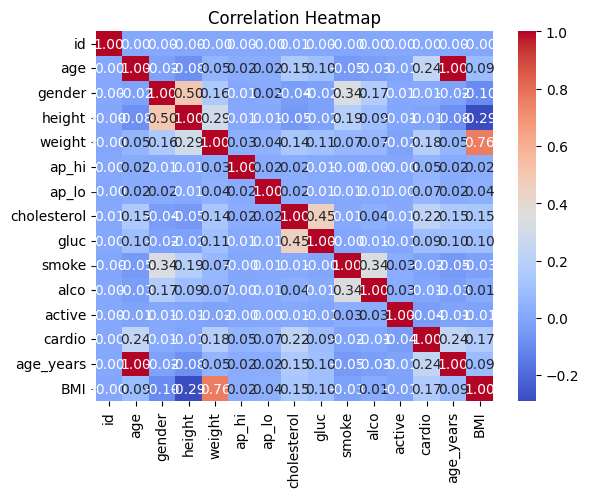

In [13]:
corr_matrix = df.corr(numeric_only=True)
plt.Figure(figsize=(20,12))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### 12. Histogram For Height & Weight

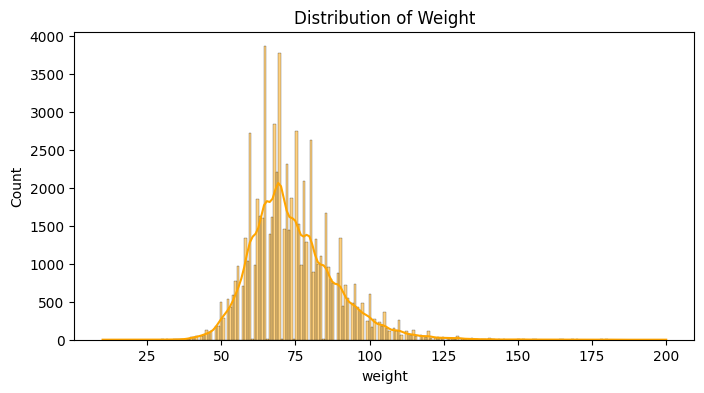

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='weight',kde=True,color='orange')
plt.title("Distribution of Weight")
plt.show()

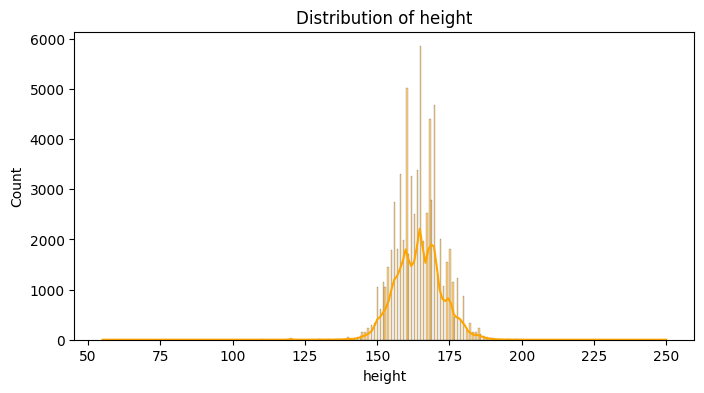

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='height',kde=True,color='orange')
plt.title("Distribution of height")
plt.show()

### 13. Scatter Plot (age_years vs ap_hi / ap_lo)

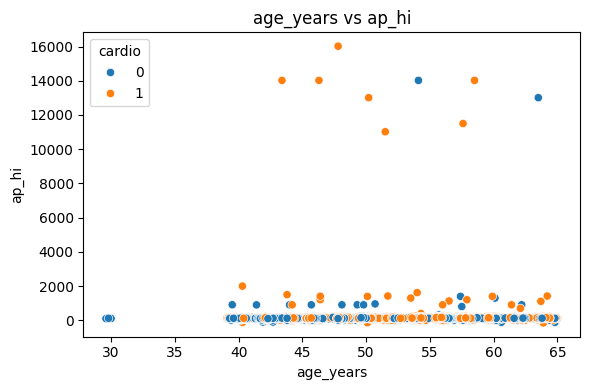

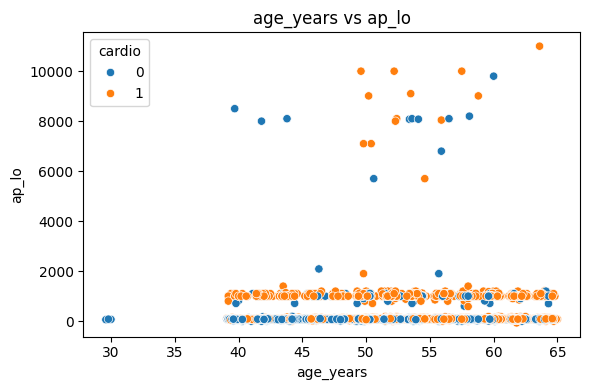

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age_years', y='ap_hi', hue='cardio', data=df.sample(min(70000,len(df))))
plt.title('age_years vs ap_hi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='age_years', y='ap_lo', hue='cardio', data=df.sample(min(70000,len(df))))
plt.title('age_years vs ap_lo')
plt.tight_layout()
plt.show()

### 14. Boxplot For Height & Weight by Cardio(Target)

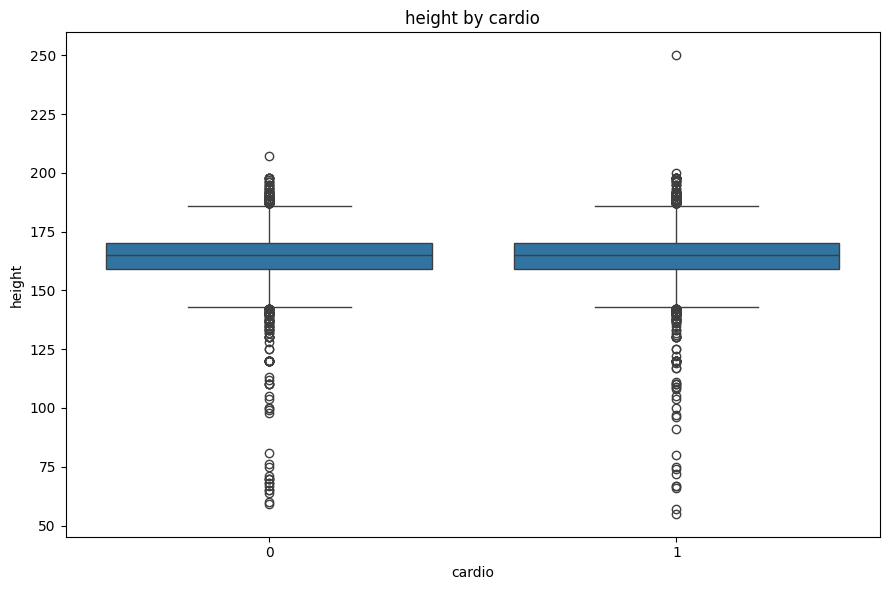

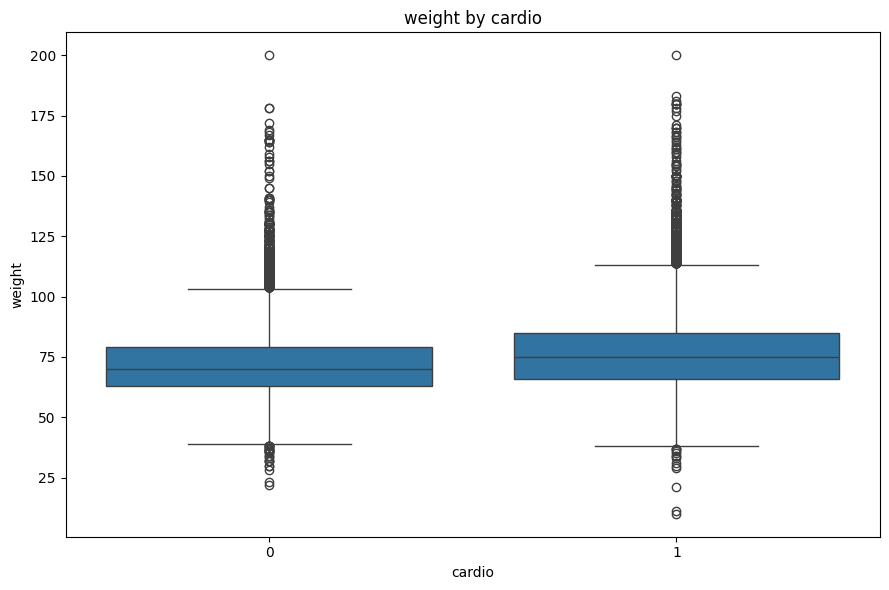

In [17]:
plt.figure(figsize=(9,6))
sns.boxplot(x='cardio', y='height', data=df)
plt.title(f'height by cardio')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,6))
sns.boxplot(x='cardio', y='weight', data=df)
plt.title(f'weight by cardio')
plt.tight_layout()
plt.show()

### 15. Average Age Of Patient With Cardiovascular Disease.

In [18]:
cardiovascular_disease = df[df['cardio'] == 1]
avg_age = cardiovascular_disease['age_years'].mean()
print(f"Average age of patients with cardiovascular disease: {avg_age:.2f} years")

Average age of patients with cardiovascular disease: 54.95 years


### 16. Distribution of Cardiovascular Disease Cases by Gender and Cholesterol Level

In [19]:
df_copy = df.copy()
df_copy['Gender'] = df_copy['gender'].map({1:'Women',2:'Men'})
df_copy['cholesterol_map'] = df_copy['cholesterol'].map({1:'Normal',2:'Above Normal',3:'Well Above Normal'})
df_copy.pivot_table(values='cardio',index='Gender',columns='cholesterol_map',aggfunc='sum',fill_value=0)

cholesterol_map,Above Normal,Normal,Well Above Normal
Gender,,,
Men,2006,8467,1890
Women,3744,14588,4284


### 17. Bar Plot For Cardiovascular Cases by Glucose Level

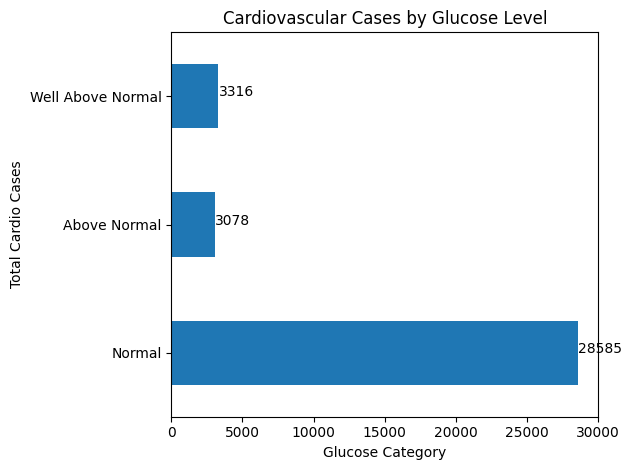

In [20]:
gluc_group = df.groupby('gluc')['cardio'].sum()
gluc_map = {1:'Normal',2:'Above Normal',3:'Well Above Normal'}
gluc_group.index = gluc_group.index.map(gluc_map)

bars = gluc_group.plot(kind='barh',x={gluc_map.values})
plt.title("Cardiovascular Cases by Glucose Level")
plt.xlabel("Glucose Category")
plt.ylabel("Total Cardio Cases")

for bar in bars.patches:
    plt.text(bar.get_width()+1,bar.get_y() + bar.get_height() / 2,bar.get_width())
    
plt.tight_layout()    
plt.show()

### 18. Average Height and Weight by Gender and Cardiovascular Disease Status

In [21]:
df_copy['cardio_label'] = df_copy['cardio'].map({1:'Cardiovascular Disease',0:'No Cardiovascular Disease'})
df_copy.groupby(['Gender','cardio_label'])[['height','weight']].mean().reset_index()

,Gender,cardio_label,height,weight
0,Men,Cardiovascular Disease,170.070857,79.840929
1,Men,No Cardiovascular Disease,169.822334,74.619055
2,Women,Cardiovascular Disease,161.099487,75.172276
3,Women,No Cardiovascular Disease,161.608405,69.992834


### 19. Cardio Cases by Cholesterol and Glucose Levels

In [22]:
df_copy['gluc_label'] = df_copy['gluc'].map(gluc_map)
df_copy.pivot_table(values='cardio', index='cholesterol_map', columns='gluc_label', aggfunc='sum', fill_value=0)


gluc_label,Above Normal,Normal,Well Above Normal
cholesterol_map,,,
Above Normal,1453,4068,229
Normal,1205,21168,682
Well Above Normal,420,3349,2405


### 20. Average BMI by Activity & Alcohol Consumption

In [23]:
df_copy.groupby(['active', 'alco'])[['BMI']].mean().reset_index()

,active,alco,BMI
0,0,0,27.678899
1,0,1,28.946170
2,1,0,27.500084
3,1,1,27.738549


### 21. Histogram Age Distribution(Years)

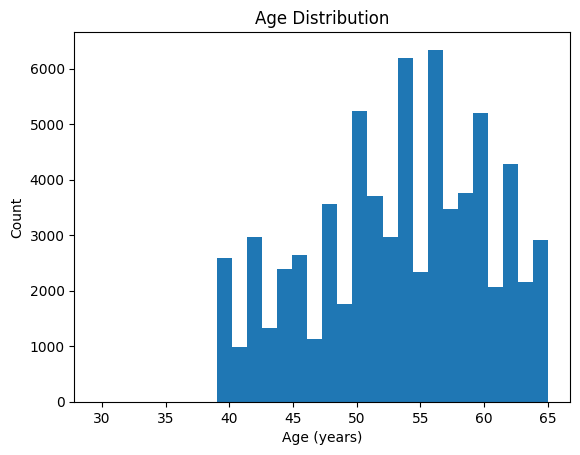

In [24]:
plt.hist(df_copy['age_years'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()


### 22. Boxplot: Blood Pressure(ap_hi / ap_lo) by Cardio Status

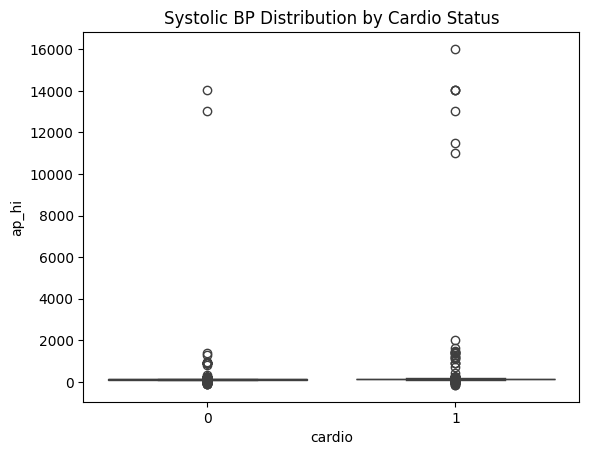

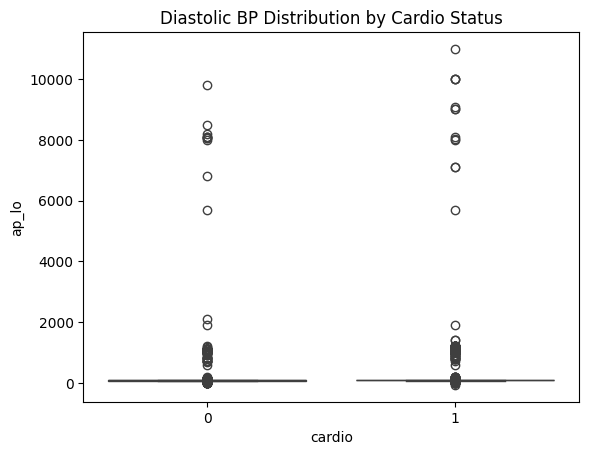

In [25]:
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title("Systolic BP Distribution by Cardio Status")
plt.show()


sns.boxplot(x='cardio', y='ap_lo', data=df)
plt.title("Diastolic BP Distribution by Cardio Status")
plt.show()


### 23. Avg. Age (Years) by Smoking & Cardio Status

In [26]:
df_copy.pivot_table(values='age_years', index='smoke', columns='cardio_label', aggfunc='mean')

cardio_label,Cardiovascular Disease,No Cardiovascular Disease
smoke,,
0,55.057822,51.807662
1,53.771765,50.976543


### 24. Compare BP & BMI across activity levels and gender for disease vs non-disease groups.

In [27]:
df_copy.groupby(['Gender', 'active', 'cardio_label']).agg({
    'age_years': 'mean',
    'ap_hi': 'mean',
    'ap_lo': 'mean',
    'BMI': 'mean'
}).round(2)


age_years   ap_hi   ap_lo    BMI
Gender active cardio_label                                               
Men    0      Cardiovascular Disease         54.58  133.50  100.26  27.77
              No Cardiovascular Disease      51.51  120.74   97.12  26.17
       1      Cardiovascular Disease         54.56  140.10  115.50  27.55
              No Cardiovascular Disease      51.69  121.38   86.77  25.84
Women  0      Cardiovascular Disease         55.28  136.03  102.22  29.13
              No Cardiovascular Disease      51.76  121.96   82.07  26.93
       1      Cardiovascular Disease         55.13  136.49  108.58  29.09
              No Cardiovascular Disease      51.77  119.54   81.94  26.88

### 25. Cholesterol & Glucose Impact.

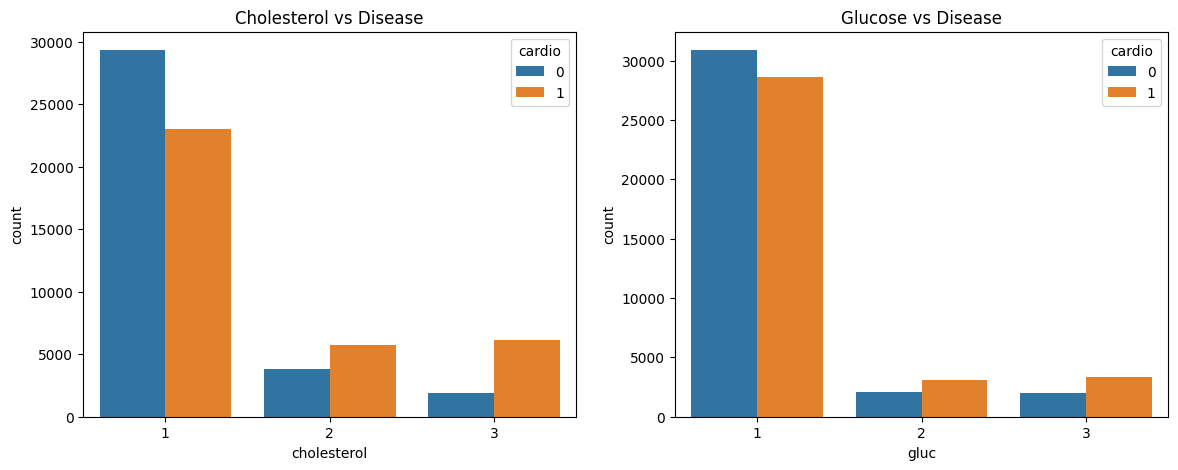

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.countplot(x="cholesterol", hue="cardio", data=df, ax=axes[0])
axes[0].set_title("Cholesterol vs Disease")

sns.countplot(x="gluc", hue="cardio", data=df, ax=axes[1])
axes[1].set_title("Glucose vs Disease")

plt.show()


### 26. Lifestyle Factors.

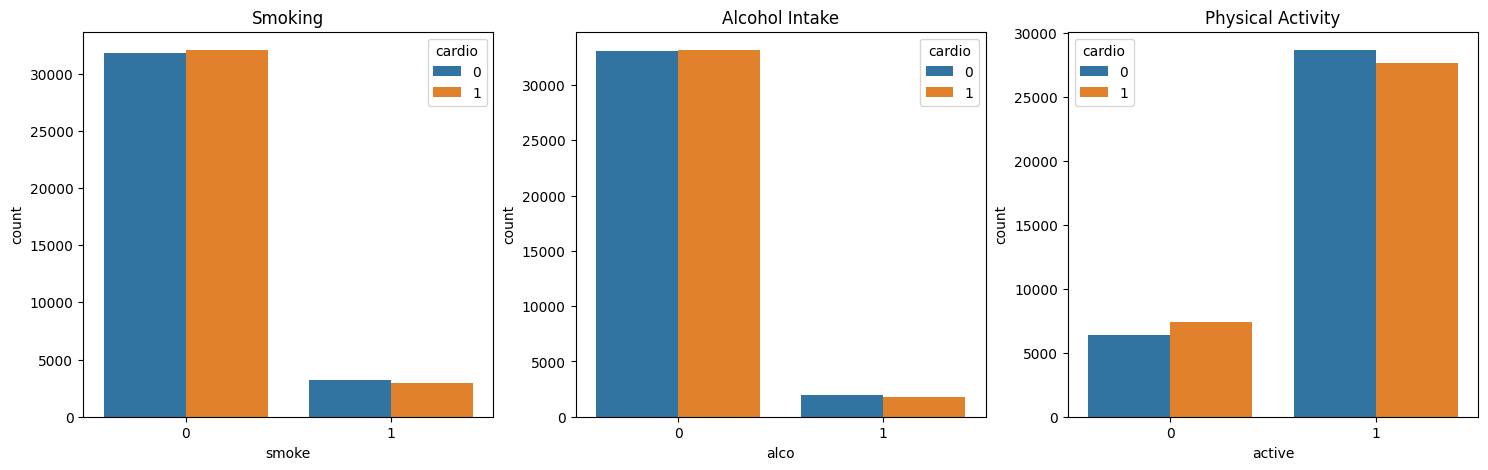

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(x="smoke", hue="cardio", data=df, ax=axes[0])
axes[0].set_title("Smoking")

sns.countplot(x="alco", hue="cardio", data=df, ax=axes[1])
axes[1].set_title("Alcohol Intake")

sns.countplot(x="active", hue="cardio", data=df, ax=axes[2])
axes[2].set_title("Physical Activity")

plt.show()


### 27. Gender vs Cardiovascular Disease

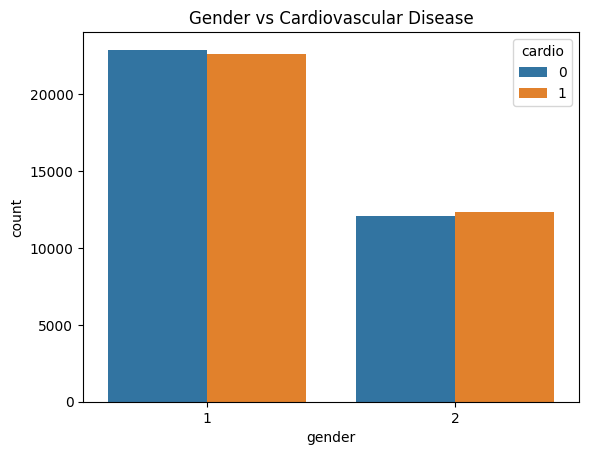

In [33]:
sns.countplot(x="gender", hue="cardio", data=df)
plt.title("Gender vs Cardiovascular Disease")
plt.show()


In [29]:
# def flag_iqr_outliers(series):
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     iqr = q3 - q1
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr
#     return ((series < lower) | (series > upper)).astype(int)

# continuous_cols = [
#     'age_years', 'height', 'weight', 
#     'ap_hi', 'ap_lo', 'BMI'
# ]

# outlier_flags = pd.DataFrame({
#     col: flag_iqr_outliers(df[col]) for col in continuous_cols
# })

# outlier_counts = outlier_flags.sum().sort_values(ascending=False)
# outlier_counts
